In [1]:
from utils_v1 import *


In [2]:
from icecream import ic

import numpy as np
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential

from src.trainer.evidential import TrainerEvidential, TrainerEvidentialUEO
import src.trainer.evidential as evidential

from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from src import metrics as _metric


In [3]:
from enum import Enum
UncertaintyMethod = Enum('Predictor', 'pred_var MI pred_entropy KL pred_entropy_single evidential')
uncertaintyMethod = "evidential"


In [4]:

config = {
	"training": True,
	"learning_rate": 1e-4, # 1e-3
	#"learning_rate": 1e-5, # 1e-3	
	"weights": [0.1, 0.9, 0],
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 1,
	"Uncertainty": {
		"annealing_step": 10*375 # 1875, 10*375*10
	},
	"uncertainty_method": uncertaintyMethod,
	"evidence_function": evidential.relu_evidence
}

'''
if config["training"] == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if config["training"] == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''
dates = [2018, 2019]
dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
	addPastDeforestationInput = config['addPastDeforestationInput'],
	borderBuffer = 2)	
# dates = [2019, 2020]
# dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	
# dataset = MTDeforestationTime()	
# [2016, 2017, 2018]

ic(dates)


if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerEvidential(
		dataset)
else:
	patchesHandler = PatchesHandler()

# exp = 170
# exp = 155
exp = 155 # relu
# exp = 171 # softsign
## exp = 173
exp = 187

# if config["training"] == True:
# trainer = TrainerEvidentialUEO(config, dataset, patchesHandler)
trainer = TrainerEvidential(config, dataset, patchesHandler)

trainer.defineExperiment(exp)


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| dates: [2018, 2019]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [5]:
exp

187

In [6]:
trainer.setExperimentPath()
trainer.createLogFolders()

In [7]:
# ic(type(dataset), exp, dataset.dates)


In [8]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [9]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [10]:

trainer.label_mask.dtype

dtype('uint8')

In [11]:

trainer.getLabelCurrentDeforestation()

In [12]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [13]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

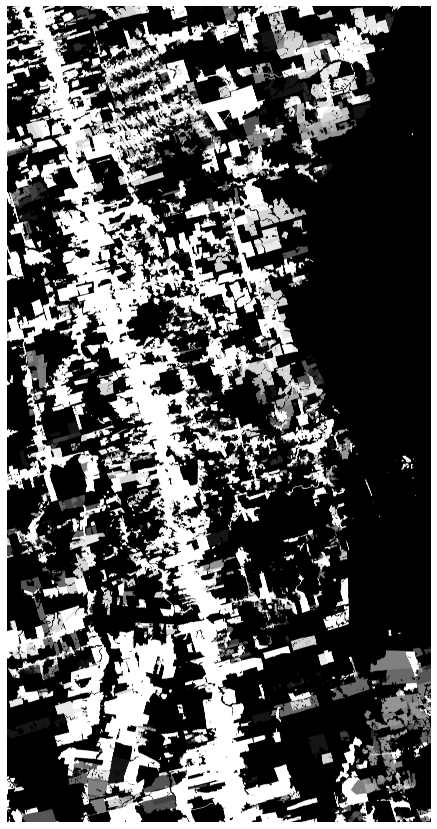

In [14]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [15]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [16]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [17]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


ic| im_idx_row.shape: (17730, 9200, 1)
    im_idx_col.shape: (17730, 9200, 1)
ic| im_idx_row.dtype: dtype('uint16')
    im_idx_col.dtype: dtype('uint16')
ic| im_idx.shape: (17730, 9200, 2), im_idx.dtype: dtype('uint16')


In [18]:
if config["training"] == True:
    trainer.extractCoords()

ic| coords.shape: (464, 239, 1, 128, 128, 2)
    coords.dtype: dtype('uint16')
ic| coords.shape: (110896, 2), coords.dtype: dtype('uint16')


In [19]:
if config["training"] == True:
    trainer.trainTestSplit()

ic| self.coords_train.shape: (41812, 3)
    self.coords_val.shape: (10260, 3)


In [20]:
if config["training"] == True:
    trainer.label_mask.shape

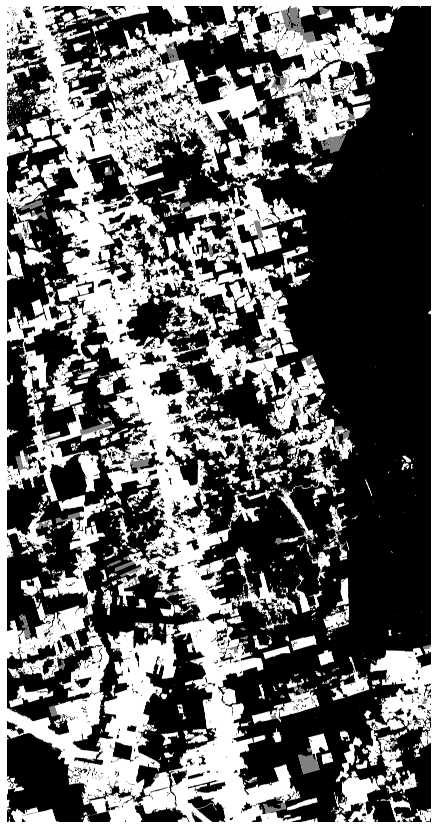

In [21]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [22]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [23]:
if config["training"] == True:
    print(trainer.coords_train)

[[    0     0     0]
 [    0    38     0]
 [    0    76     0]
 ...
 [17594  8968     0]
 [17594  9006     0]
 [17594  9044     0]]


In [24]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

training samples:  (3753, 3) validation samples:  (1032, 3)


In [25]:
if config["training"] == True:
    inputSnipShow = True

ic| np.mean(image_patch[...,[1,2,3]]): 0.107682176
    np.mean(image_patch[...,[11,12,13]]): 0.22637562


[12084  2508     0]


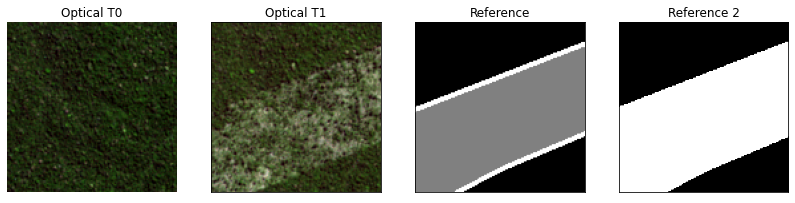

In [26]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


ic| np.mean(image_patch[...,[1,2,3]]): 0.2714837
    np.mean(image_patch[...,[11,12,13]]): 0.30292988
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 114 5928    0]


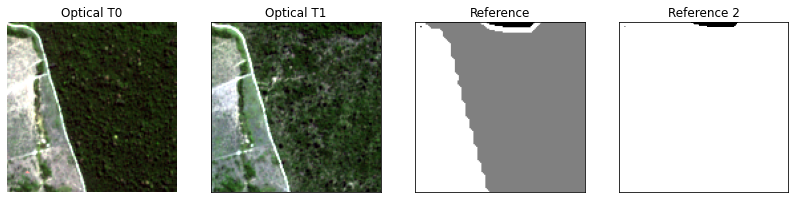

In [27]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


ic| np.mean(image_patch[...,[1,2

[3382 2128    0]


,3]]): 0.15096879
    np.mean(image_patch[...,[11,12,13]]): 0.103304155


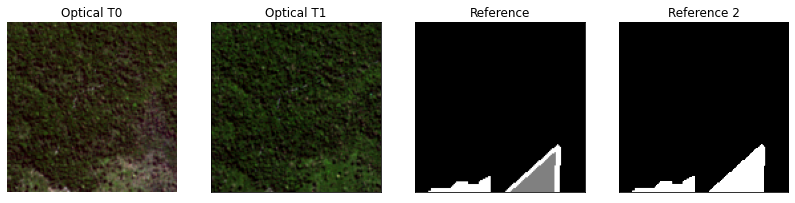

In [28]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

ic| np.mean(image_patch[...,[1,2,3]]): 0.09604081
    np.mean(image_patch[...,[11,12,13]]): 0.23388559


[ 608 6574    0]


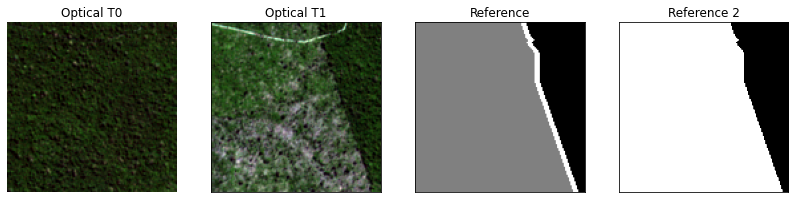

In [29]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [30]:
if config["training"] == True:
    trainer.getGenerators()


In [31]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [32]:
if config["training"] == True:
    print(trainer.path_exp)

D:/Jorge/datasets/deforestation/experiments/exp187


In [33]:
if config["training"] == True:
    print(trainer.channels)

21


In [34]:
if config["training"] == True:
    print(trainer.image_stack.shape)

(17730, 9200, 21)


In [35]:
# trainer.weights = [0.01, 0.99, 0]
trainer.weights

[0.1, 0.9, 0]

### Evidential metrics

In [36]:
if config["training"] == True:
    trainer.train()

time:  0
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_enc_net (InputLayer)      [(None, 128, 128, 21 0                                            
__________________________________________________________________________________________________
res1_net1 (Conv2D)              (None, 128, 128, 16) 3040        input_enc_net[0][0]              
__________________________________________________________________________________________________
drop_net1 (Dropout)             (None, 128, 128, 16) 0           res1_net1[0][0]                  
__________________________________________________________________________________________________
res2_net1 (Conv2D)              (None, 128, 128, 16) 2320        drop_net1[0][0]                  
_____________________________________________________________________________________

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
self.global_step 0.0
alpha Tensor("loss/add:0", shape=(None, 128, 128, 3), dtype=float32)
u Tensor("loss/truediv:0", shape=(None, 128, 128, 1), dtype=float32)
A Tensor("loss/Sum_3:0", shape=(None, 3), dtype=float32)
B Tensor("loss/Sum_4:0", shape=(None, 1, 1, 3), dtype=float32)
Tensor("loss/sub_1:0", shape=(None, 1, 1, 1), dtype=float32)
alpha Tensor("add:0", shape=(None, 128, 128, 3), dtype=float32)
u Tensor("truediv:0", shape=(None, 128, 128, 1), dtype=float32)
K.int_shape(KL_reg) Tensor("mul_6:0", shape=(None, 128, 128, 1), dtype=float32)
alpha Tensor("add_7:0", shape=(None, 128, 128, 3), dtype=float32)
u Tensor("truediv_5:0", shape=(None, 128, 128, 1), dtype=float32)
K.int_shape(KL_reg) Tensor("mul_12:0", shape=(None, 128, 128, 1), dtype=float32)
alpha Tensor("add_16:0", shape=(None, 128, 128, 3), dtype=float32)
u Tensor("truediv_13:0", shape=(None, 128, 128, 1), dtype=float32)
K.int_shape(Y) Tensor("IteratorGetNext:1", shape=(None, None, None, None), dtype=float32)
K.i

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


 350.0
351/351 [==============================] - 32s 90ms/step - loss: 0.2761 - accuracy: 0.8967 - KL_term: 0.0183 - loglikelihood_term: 0.1749 - evidential_success: 33.5400 - evidential_fail: 9.2803 - acc: 0.8969 - annealing_coef: 0.0933 - global_step_get: 350.0000 - annealing_step_get: 3750.0000 - UEO_term: 0.7040 - val_loss: 0.3313 - val_accuracy: 0.8886 - val_KL_term: 0.0348 - val_loglikelihood_term: 0.1917 - val_evidential_success: 30.8958 - val_evidential_fail: 7.3863 - val_acc: 0.8901 - val_annealing_coef: 0.1867 - val_global_step_get: 700.0000 - val_annealing_step_get: 3750.0000 - val_UEO_term: 0.6771

Epoch 00002: val_loss improved from 0.37885 to 0.33130, saving model to D:/Jorge/datasets/deforestation/experiments/exp187/models\resunet_0.h5
Epoch 3/100
self.global_step 700.0
351/351 [==============================] - 32s 91ms/step - loss: 0.2600 - accuracy: 0.9067 - KL_term: 0.0210 - loglikelihood_term: 0.1595 - evidential_success: 41.2321 - evidential_fail: 8.5331 - acc: 0.

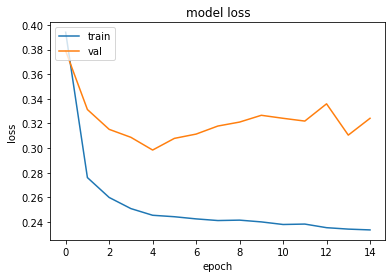

In [37]:
if config["training"] == True:
    trainer.plotHistory()


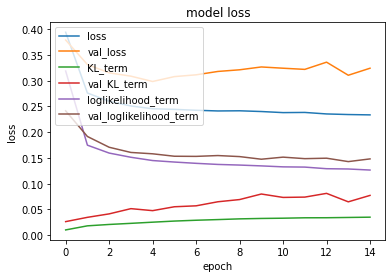

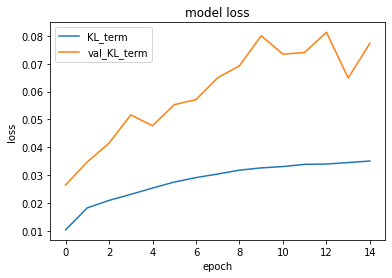

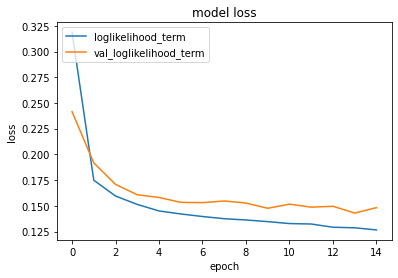

In [38]:
if config["training"] == True:
    trainer.plotLossTerms()

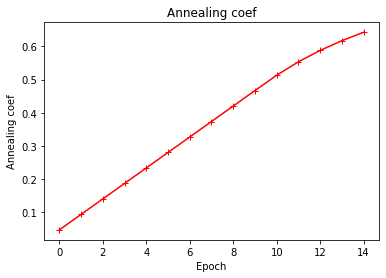

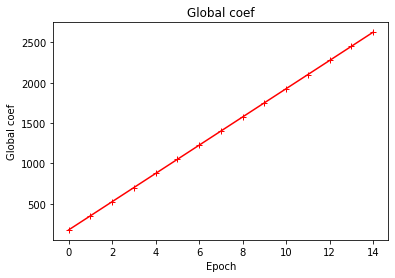

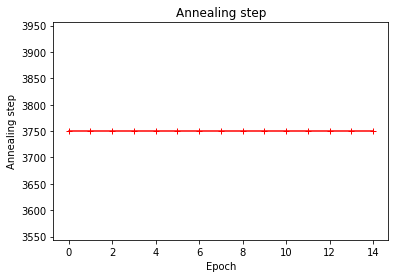

In [39]:
if config["training"] == True:
    trainer.plotAnnealingCoef()

In [40]:
def draw_EDL_results(K, history):
    # train_acc1, train_ev_s, train_ev_f, test_acc1, test_ev_s, test_ev_f 
    # calculate uncertainty for training and testing data for correctly and misclassified samples
    '''
    K: known classes
    '''
    train_u_succ = K / (K+np.array(history['evidential_success']))
    train_u_fail = K / (K+np.array(history['evidential_fail']))
    test_u_succ  = K / (K+np.array(history['val_evidential_success']))
    test_u_fail  = K / (K+np.array(history['val_evidential_fail']))
    
    f, axs = plt.subplots(2, 2)
    f.set_size_inches([10,10])
    
    axs[0,0].plot(history['evidential_success'],c='r',marker='+')
    axs[0,0].plot(history['evidential_fail'],c='k',marker='x')
    axs[0,0].set_title('Train Data')
    axs[0,0].set_xlabel('Epoch')
    axs[0,0].set_ylabel('Estimated total evidence for classification') 
    axs[0,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[0,1].plot(train_u_succ,c='r',marker='+')
    axs[0,1].plot(train_u_fail,c='k',marker='x')
    axs[0,1].plot(history['acc'],c='blue',marker='*')
    axs[0,1].set_title('Train Data')
    axs[0,1].set_xlabel('Epoch')
    axs[0,1].set_ylabel('Estimated uncertainty for classification')
    axs[0,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    
    axs[1,0].plot(history['val_evidential_success'],c='r',marker='+')
    axs[1,0].plot(history['val_evidential_fail'],c='k',marker='x')
    axs[1,0].set_title('Test Data')
    axs[1,0].set_xlabel('Epoch')
    axs[1,0].set_ylabel('Estimated total evidence for classification') 
    axs[1,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[1,1].plot(test_u_succ,c='r',marker='+')
    axs[1,1].plot(test_u_fail,c='k',marker='x')
    axs[1,1].plot(history['val_acc'],c='blue',marker='*')
    axs[1,1].set_title('Test Data')
    axs[1,1].set_xlabel('Epoch')
    axs[1,1].set_ylabel('Estimated uncertainty for classification')
    axs[1,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    

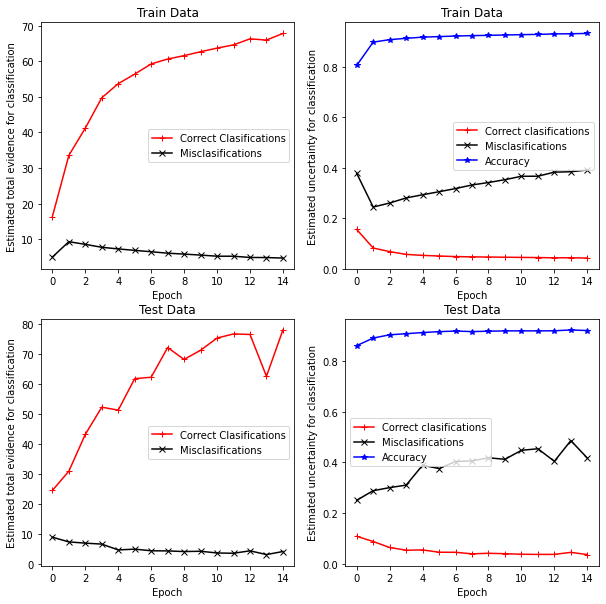

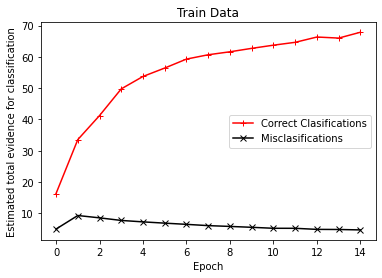

In [41]:
if config["training"] == True:
    draw_EDL_results(trainer.class_n, trainer.history.history)

    plt.figure(5)
    plt.plot(trainer.history.history['evidential_success'],c='r',marker='+')
    plt.plot(trainer.history.history['evidential_fail'],c='k',marker='x')
    plt.title('Train Data')
    plt.xlabel('Epoch')
    plt.ylabel('Estimated total evidence for classification') 
    plt.legend(['Correct Clasifications','Misclasifications'])


In [42]:
trainer.image_stack.shape

(17730, 9200, 21)

In [43]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [44]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]

In [45]:
trainer.image_stack.shape

(17730, 9200, 21)

In [46]:
trainer.setPadding()

-30.0 -16.0


In [47]:
trainer.infer()

ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp187/models/resunet_0.h5'


time:  0


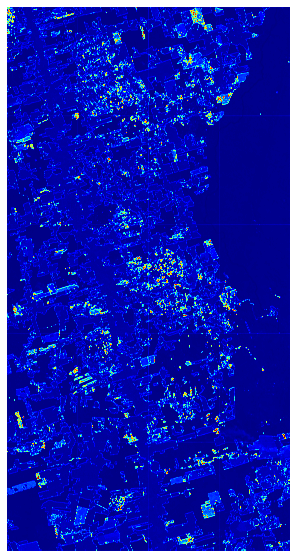

In [48]:
trainer.logger.plotFigure(trainer.u_reconstructed, 
            name='Uncertainty', cmap='jet', savefig=False, figsize=(10,10))

In [49]:
trainer.loadPredictedProbabilities()


In [50]:
trainer.prob_rec.shape

(17760, 9216)

In [51]:
trainer.getMeanProb()

In [52]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 0.0036286816
    np.mean(value): 0.032344162
    np.max(value): 0.929128


In [53]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

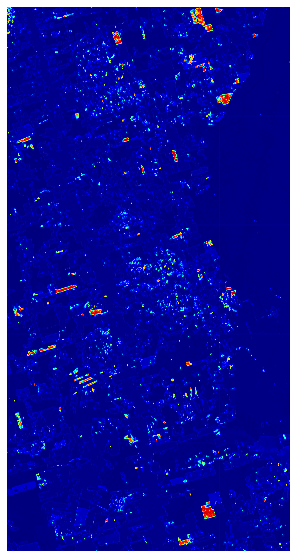

In [54]:
trainer.unpadMeanProb()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

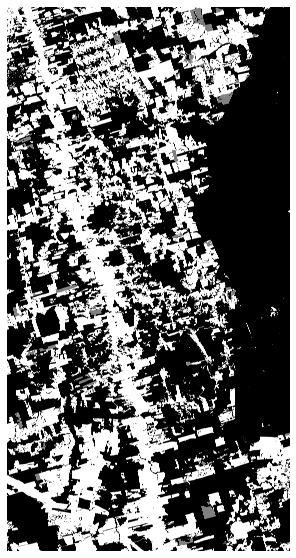

In [55]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [56]:
trainer.squeezeLabel()

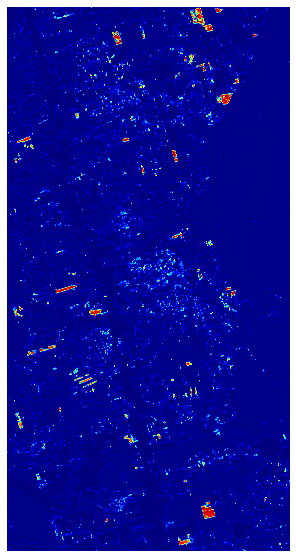

In [57]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [58]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 0.0
    np.mean(value): 0.023834804
    np.max(value): 0.9227199


In [59]:
print(trainer.label_mask.shape)

(17730, 9200)


In [60]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [61]:
trainer.getMAP()

81.42


In [62]:
trainer.prob_rec.shape

(17760, 9216)

In [63]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(17760, 9216, 1)


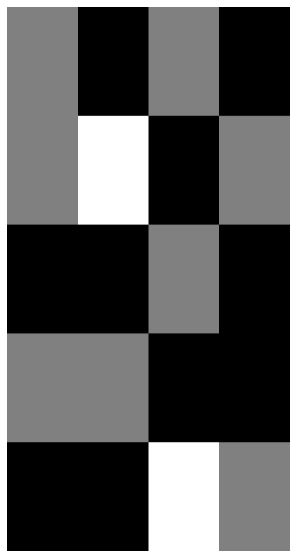

In [64]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [65]:
trainer.getLabelCurrentDeforestation()

In [66]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161183980,   1932020], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [67]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [68]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161183980,   1932020], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161579597,   1536403], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162720383,    395617], dtype=int64))


In [69]:
trainer.calculateMetrics()

ic| self.f1: 79.95, self.precision: 85.36, self.recall: 75.19


In [70]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9409050,)
ic| f1_val: 84.16
    precision_val: 87.08
    recall_val: 81.44
    mAP_val: 88.65


In [71]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [72]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162350219,    765781], dtype=int64))


In [73]:
'''

import types

trainer.getErrorMaskToShowRGB = types.MethodType(getErrorMaskToShowRGB, trainer)
'''


'\n\nimport types\n\ntrainer.getErrorMaskToShowRGB = types.MethodType(getErrorMaskToShowRGB, trainer)\n'

In [74]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


In [75]:
predicted_unpad_to_show = trainer.predicted_unpad.copy()

predicted_unpad_to_show[trainer.label_mask == 2] = 0
print(np.unique(predicted_unpad_to_show))

[0. 1.]


In [76]:
predicted_unpad_to_show.shape

(17730, 9200)

In [77]:

'''
trainer.logger.plotFigure = types.MethodType(trainer.logger.plotFigure, trainer)
'''

'\ntrainer.logger.plotFigure = types.MethodType(trainer.logger.plotFigure, trainer)\n'

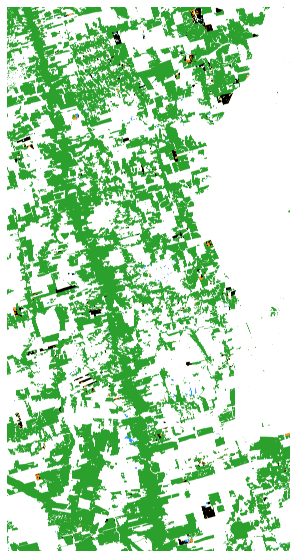

In [78]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [79]:
trainer.setUncertainty()

In [80]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54048424,)


In [81]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0, np.mean(value): 0.04651075, np.max(value): 1.0


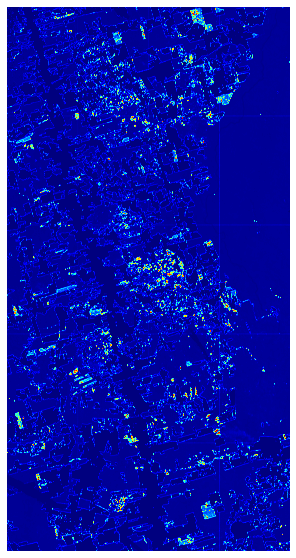

In [82]:
trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty evidential learning.png', figsize=(10,10), cmap='jet', savefig=True)

ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


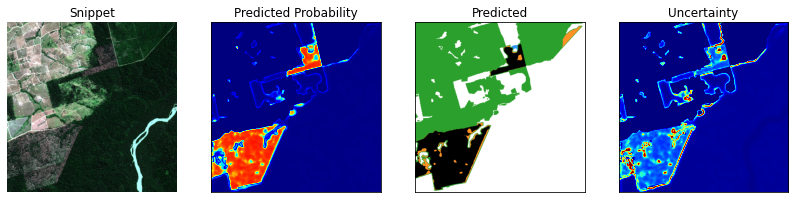

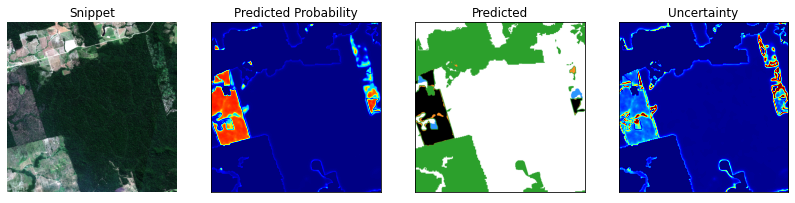

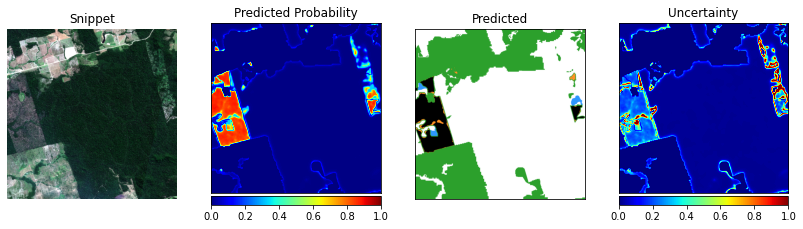

In [83]:
trainer.logger.plotCropSample(trainer)

In [84]:
trainer.logger.getStats(trainer.uncertainty)

ic| np.min(value): 0.010886045
    np.mean(value): 0.06605703
    np.max(value): 1.0


In [85]:
trainer.getSUEO()
# import pdb
# pdb.set_trace()

(54048424,) (54048424,)


0.4166871755245352

In [86]:
trainer.sUEO  

0.4166871755245352

In [87]:
trainer.getUncertaintyMetrics()

(array([0, 1], dtype=int8), array([53573242,   475182], dtype=int64))
0.010886045 0.057773154 0.9999992
1.0 1.0 1.0
(53573242,) (53573242,)


ic| label_current_deforestation_test_classified_incorrect.shape: (475182,)
    predicted_test_classified_incorrect.shape: (475182,)
d:\Jorge\deforestation_uncertainty\src\trainer\evidential.py:612: RuntimeWarning: invalid value encountered in longlong_scalars
  
ic| TP_H + FN_H + FP_H + TN_H: 475182
    len(self.label_mask_current_deforestation_test): 54048424
ic| TP_H + FN_H + FP_H + TN_H: 475182
    len(self.label_mask_current_deforestation_test): 54048424


cm_correct [[52830419    93479]
 [  104159   545185]]
cm_incorrect [[399441      0]
 [ 75741      0]]


In [88]:
trainer.m

{'precision_L': 0.8536335224781731,
 'recall_L': 0.8395934974374137,
 'recall_Ltotal': 0.7518911575884206,
 'AA': 0.008791782716920663,
 'precision_H': nan,
 'recall_H': 0.0,
 'f1_L': 0.8465553008987522,
 'f1_H': nan}

In [89]:
print(trainer.uncertainty.shape, trainer.predicted_test.shape)
print(trainer.uncertainty.dtype, trainer.predicted_test.dtype)
print(np.unique(trainer.predicted_test))
print(trainer.label_mask_current_deforestation_test.shape)


(54048424,) (54048424,)
float32 float32
[0. 1.]
(54048424,)


In [90]:
trainer.mean_prob[trainer.mask_amazon_ts == 1].shape

(81558000,)

In [91]:
uncertainty_test_correct = trainer.uncertainty[trainer.predicted_test == trainer.label_mask_current_deforestation_test]
uncertainty_test_incorrect = trainer.uncertainty[trainer.predicted_test != trainer.label_mask_current_deforestation_test]

predicted_test_correct = trainer.uncertainty[trainer.predicted_test == trainer.label_mask_current_deforestation_test]
uncertainty_test_incorrect = trainer.uncertainty[trainer.predicted_test != trainer.label_mask_current_deforestation_test]


In [92]:
print(np.min(uncertainty_test_correct), np.mean(uncertainty_test_correct), np.max(uncertainty_test_correct))
print(np.min(uncertainty_test_incorrect), np.mean(uncertainty_test_incorrect), np.max(uncertainty_test_incorrect))


0.010886045 0.063272335 1.0
0.02342763 0.6138137 1.0


In [93]:
trainer.alpha_reconstructed.shape

(17760, 9216, 3)

In [94]:
trainer.alpha_unpad = trainer.alpha_reconstructed[:trainer.label_mask.shape[0], :trainer.label_mask.shape[1]]

In [95]:
trainer.alpha_unpad.shape

(17730, 9200, 3)

In [96]:
print(np.min(trainer.alpha_unpad), np.mean(trainer.alpha_unpad), np.max(trainer.alpha_unpad))

1.0 29.904066 273.58218


In [97]:
trainer.predicted_unpad.shape

(17730, 9200)

In [98]:
trainer.label_mask.shape

(17730, 9200)

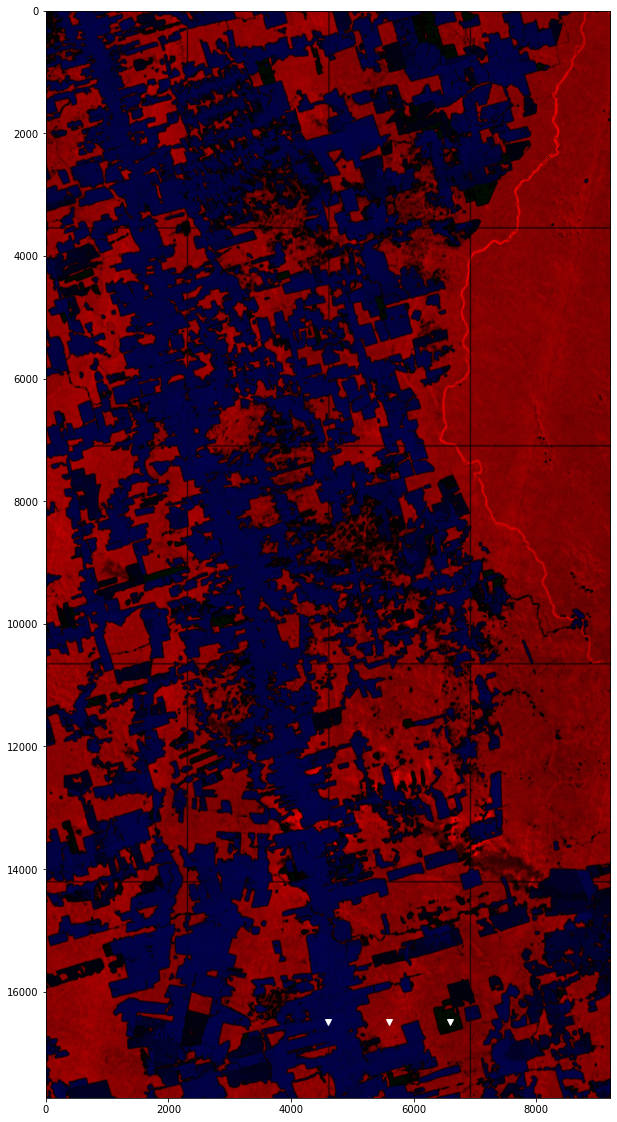

In [99]:
fig = plt.figure(figsize=(20,20))

plt.imshow(trainer.alpha_unpad.astype(np.uint8))
plt.plot(6600, 16500, marker='v', color="white")
plt.plot(5600, 16500, marker='v', color="white")
plt.plot(4600, 16500, marker='v', color="white")

In [100]:
[2200, 3200, 6900, 7900]

[2200, 3200, 6900, 7900]

In [101]:
row, col = (16500, 5600)
row, col = (16500, 6600)
row, col = (16500, 4600)


2
0.0


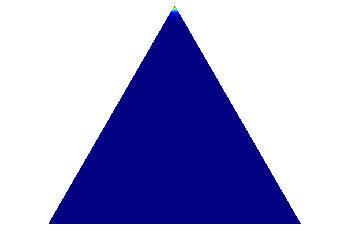

In [102]:
# trainer.predicted_unpad[2500, 7300]

# trainer.predicted_unpad[16500, 6600]
# trainer.predicted_unpad[16500, 5600]

print(trainer.label_mask[row, col])
print(trainer.predicted_unpad[row, col])
trainer.getMassFcn(trainer.alpha_unpad[row, col])


In [103]:
# trainer.getMassFcn(trainer.alpha_reconstructed[2500,7300])
# trainer.getMassFcn(trainer.alpha_unpad[16500,6600])


In [104]:
trainer.m

{'precision_L': 0.8536335224781731,
 'recall_L': 0.8395934974374137,
 'recall_Ltotal': 0.7518911575884206,
 'AA': 0.008791782716920663,
 'precision_H': nan,
 'recall_H': 0.0,
 'f1_L': 0.8465553008987522,
 'f1_H': nan}

In [105]:
trainer.getUncertaintyAAValues()

ic| self.uncertainty.shape: (54048424,)
    self.label_mask_current_deforestation_test.shape: (54048424,)


[0.13, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
threshold 0.13
(48342493,) (48342493,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5705931,)
    predicted_test_classified_incorrect.shape: (5705931,)


cm_correct [[48322610        0]
 [   19875        8]]


ic| TP_H + FN_H + FP_H + TN_H: 5705931
    len(label_mask_current_deforestation_test): 54048424
ic| TP_H + FN_H + FP_H + TN_H: 5705931
    len(label_mask_current_deforestation_test): 54048424


cm_incorrect [[4907250   93479]
 [ 160025  545177]]
[1.00000000e+00 4.02353770e-04 1.10331892e-05 1.05570719e-01
 8.53631689e-01 7.73079203e-01 4.42739415e-02]
threshold 0.15
(48877822,) (48877822,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5170602,)
    predicted_test_classified_incorrect.shape: (5170602,)


cm_correct [[48855123        0]
 [   22163      536]]


ic| TP_H + FN_H + FP_H + TN_H: 5170602
    len(label_mask_current_deforestation_test): 54048424
ic| TP_H + FN_H + FP_H + TN_H: 5170602
    len(label_mask_current_deforestation_test): 54048424


cm_incorrect [[4374737   93479]
 [ 157737  544649]]
[1.00000000e+00 2.36133750e-02 7.39223677e-04 9.56661012e-02
 8.53510581e-01 7.75426902e-01 4.83780799e-02]
threshold 0.2
(49930448,) (49930448,)


ic| label_current_deforestation_test_classified_incorrect.shape: (4117976,)
    predicted_test_classified_incorrect.shape: (4117976,)


cm_correct [[49788773       73]
 [   26979   114623]]


ic| TP_H + FN_H + FP_H + TN_H: 4117976
    len(label_mask_current_deforestation_test): 54048424
ic| TP_H + FN_H + FP_H + TN_H: 4117976
    len(label_mask_current_deforestation_test): 54048424


cm_incorrect [[3441087   93406]
 [ 152921  430562]]
[0.99936353 0.80947303 0.15808216 0.07619049 0.82173339 0.73791696
 0.0594271 ]
threshold 0.225
(50372417,) (50372417,)


ic| label_current_deforestation_test_classified_incorrect.shape: (3676007,)
    predicted_test_classified_incorrect.shape: (3676007,)


cm_correct [[50127737      795]
 [   29410   214475]]


ic| TP_H + FN_H + FP_H + TN_H: 3676007
    len(label_mask_current_deforestation_test): 54048424
ic| TP_H + FN_H + FP_H + TN_H: 3676007
    len(label_mask_current_deforestation_test): 54048424


cm_incorrect [[3102123   92684]
 [ 150490  330710]]
[0.99630696 0.87941038 0.29579291 0.06801321 0.78109279 0.68726101
 0.06561254]
threshold 0.25
(50743548,) (50743548,)


ic| label_current_deforestation_test_classified_incorrect.shape: (3304876,)
    predicted_test_classified_incorrect.shape: (3304876,)


cm_correct [[50422386     2811]
 [   31652   286699]]


ic| TP_H + FN_H + FP_H + TN_H: 3304876
    len(label_mask_current_deforestation_test): 54048424
ic| TP_H + FN_H + FP_H + TN_H: 3304876
    len(label_mask_current_deforestation_test): 54048424


cm_incorrect [[2807474   90668]
 [ 148248  258486]]
[0.99029049 0.90057515 0.39540054 0.06114657 0.74032089 0.63551609
 0.0715459 ]
threshold 0.27
(51000766,) (51000766,)


ic| label_current_deforestation_test_classified_incorrect.shape: (3047658,)
    predicted_test_classified_incorrect.shape: (3047658,)


cm_correct [[50634139     5066]
 [   33442   328119]]


ic| TP_H + FN_H + FP_H + TN_H: 3047658
    len(label_mask_current_deforestation_test): 54048424
ic| TP_H + FN_H + FP_H + TN_H: 3047658
    len(label_mask_current_deforestation_test): 54048424


cm_incorrect [[2595721   88413]
 [ 146458  217066]]
[0.98479523 0.90750662 0.45252488 0.05638755 0.71057585 0.59711601
 0.07610446]
threshold 0.3
(51337297,) (51337297,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2711127,)
    predicted_test_classified_incorrect.shape: (2711127,)


cm_correct [[50917972    10272]
 [   36198   372855]]


ic| TP_H + FN_H + FP_H + TN_H: 2711127
    len(label_mask_current_deforestation_test): 54048424
ic| TP_H + FN_H + FP_H + TN_H: 2711127
    len(label_mask_current_deforestation_test): 54048424


cm_incorrect [[2311888   83207]
 [ 143702  172330]]
[0.97318905 0.9115078  0.51422247 0.05016107 0.67438375 0.54529288
 0.08228505]
threshold 0.34
(51720290,) (51720290,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2328134,)
    predicted_test_classified_incorrect.shape: (2328134,)


cm_correct [[51242226    21333]
 [   39839   416892]]


ic| TP_H + FN_H + FP_H + TN_H: 2328134
    len(label_mask_current_deforestation_test): 54048424
ic| TP_H + FN_H + FP_H + TN_H: 2328134
    len(label_mask_current_deforestation_test): 54048424


cm_incorrect [[1987634   72146]
 [ 140061  128293]]
[0.95131953 0.9127736  0.57495604 0.04307497 0.64006007 0.47807374
 0.08881533]
threshold 0.36
(51890073,) (51890073,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2158351,)
    predicted_test_classified_incorrect.shape: (2158351,)


cm_correct [[51386178    28126]
 [   41598   434171]]


ic| TP_H + FN_H + FP_H + TN_H: 2158351
    len(label_mask_current_deforestation_test): 54048424
ic| TP_H + FN_H + FP_H + TN_H: 2158351
    len(label_mask_current_deforestation_test): 54048424


cm_incorrect [[1843682   65353]
 [ 138302  111014]]
[0.93916032 0.91256681 0.59878635 0.03993365 0.62944882 0.44527427
 0.09140401]
threshold 0.45
(52497206,) (52497206,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1551218,)
    predicted_test_classified_incorrect.shape: (1551218,)
ic| TP_H + FN_H + FP_H + TN_H: 1551218
    len(label_mask_current_deforestation_test): 54048424


cm_correct [[51908627    52697]
 [   49934   485948]]
cm_incorrect [[1321233   40782]
 [ 129966   59237]]


ic| TP_H + FN_H + FP_H + TN_H: 1551218
    len(label_mask_current_deforestation_test): 54048424


[0.90216748 0.90681904 0.67019453 0.02870052 0.59225747 0.313087
 0.1032428 ]
threshold 0.55
(52928959,) (52928959,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1119465,)
    predicted_test_classified_incorrect.shape: (1119465,)
ic| TP_H + FN_H + FP_H + TN_H: 1119465
    len(label_mask_current_deforestation_test): 54048424
ic| TP_H + FN_H + FP_H + TN_H: 1119465
    len(label_mask_current_deforestation_test): 54048424


cm_correct [[52282033    71322]
 [   59141   516463]]
cm_incorrect [[947827  22157]
 [120759  28722]]
[0.87865971 0.89725401 0.71227925 0.02071226 0.56451581 0.19214482
 0.11433939]
threshold 0.65
(53178966,) (53178966,)


ic| label_current_deforestation_test_classified_incorrect.shape: (869458,)
    predicted_test_classified_incorrect.shape: (869458,)
ic| TP_H + FN_H + FP_H + TN_H: 869458
    len(label_mask_current_deforestation_test): 54048424
ic| TP_H + FN_H + FP_H + TN_H: 869458
    len(label_mask_current_deforestation_test): 54048424


cm_correct [[52493444    84547]
 [   67034   533941]]
cm_incorrect [[736416   8932]
 [112866  11244]]
[0.8633005  0.88845792 0.73638401 0.01608665 0.5572958  0.09059705
 0.11928829]
threshold 0.8
(53396787,) (53396787,)


ic| label_current_deforestation_test_classified_incorrect.shape: (651637,)
    predicted_test_classified_incorrect.shape: (651637,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 651637
    len(label_mask_current_deforestation_test): 54048424
ic| TP_H + FN_H + FP_H + TN_H: 651637
    len(label_mask_current_deforestation_test): 54048424


cm_correct [[52676914    93479]
 [   81209   545185]]
cm_incorrect [[552946      0]
 [ 98691      0]]
[0.85363352 0.87035476 0.75189116 0.01205654        nan 0.
 0.11943364]


In [106]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54048424,)
    self.label_mask_current_deforestation_test.shape: (54048424,)


threshold 0.13
(54048424,) (54048424,)
cm_audited [[53323339        0]
 [   19875   705210]]
[1.         0.97258942]
threshold 0.15
(54048424,) (54048424,)
cm_audited [[53323339        0]
 [   22163   702922]]
[1.         0.96943393]
threshold 0.2
(54048424,) (54048424,)
cm_audited [[53323266       73]
 [   26979   698106]]
[0.99989544 0.96279195]
threshold 0.225
(54048424,) (54048424,)
cm_audited [[53322544      795]
 [   29410   695675]]
[0.99885853 0.95943924]
threshold 0.25
(54048424,) (54048424,)
cm_audited [[53320528     2811]
 [   31652   693433]]
[0.99596262 0.95634719]
threshold 0.27
(54048424,) (54048424,)
cm_audited [[53318273     5066]
 [   33442   691643]]
[0.99272867 0.95387851]
threshold 0.3
(54048424,) (54048424,)
cm_audited [[53313067    10272]
 [   36198   688887]]
[0.98530806 0.95007758]
threshold 0.34
(54048424,) (54048424,)
cm_audited [[53302006    21333]
 [   39839   685246]]
[0.96980805 0.9450561 ]
threshold 0.36
(54048424,) (54048424,)
cm_audited [[53295213    2

In [ ]:
trainer.setPlotLimsForUncertaintyAA()

In [ ]:

def plotUncertaintyAA(self):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    ax1.plot(self.m['AA']*100, self.m['precision_L']*100, 'C3-', label="Precision Low Uncertainty")
    ax1.plot(self.m['AA']*100, self.m['recall_L']*100, 'C3--', label="Recall Low Uncertainty")
    ax1.plot(self.m['AA']*100, self.m['precision_H']*100, 'C0-', label="Precision High Uncertainty")
    ax1.plot(self.m['AA']*100, self.m['recall_H']*100, 'C0--', label="Recall High Uncertainty")
    ax1.plot(self.m['AA']*100, self.m_audited['precision']*100, 'C2-', label="Precision Audited")
    ax1.plot(self.m['AA']*100, self.m_audited['recall']*100, 'C2--', label="Recall Audited")

    ax1.legend(loc="lower right")
    ax1.set_ylabel('Precision/recall (%)')
    ax1.set_xlabel('Audit Area (%)')
    ax1.set_ylim(self.ylim)
    ax1.set_xlim(self.xlim)
    ax1.grid()

    xs = [0, 120]
    ax1.vlines(x = 3, ymin = 0, ymax = max(xs),
            colors = (0.2, 0.2, 0.2),
            label = 'vline_multiple - full height')

    ax2.plot(range(int(self.xlim[0]), int(self.xlim[1] + 2)), 
        np.ones(int(self.xlim[1] + 2)) * self.f1, 
        'C1:', label="F1 No Uncertainty")

    ax2.plot(self.m['AA']*100, self.m['f1_L']*100, 'C3-', label="F1 Low Uncertainty")
    ax2.plot(self.m['AA']*100, self.m['f1_H']*100, 'C0-', label="F1 High Uncertainty")
    ax2.plot(self.m['AA']*100, self.m_audited['f1']*100, 'C2-', label="F1 Audited")

    ax2.legend(loc="lower right")
    ax2.set_ylabel('F1 score (%)')
    ax2.set_xlabel('Audit Area (%)')
    ax2.set_ylim(self.ylim)
    ax2.set_xlim(self.xlim)

    ax2.grid()

    xs = [0, 120]
    ax2.vlines(x = 3, ymin = 0, ymax = max(xs),
            colors = (0.2, 0.2, 0.2),
            label = '3% AA')

    ax3.plot(np.asarray(self.threshold_list), self.m['AA']*100, label="AA")
    ax3.set_ylabel('Audit Area (%)')
    ax3.set_xlabel('Uncertainty Threshold')
    ax3.grid()
    ax3.set_ylim(self.xlim)

    self.xlim_adjusted = ax3.get_xlim()
    ax3.hlines(y = 3, xmin = self.xlim_adjusted[0], xmax = self.xlim_adjusted[1],
            colors = (0.2, 0.2, 0.2),
            label = '3% AA')

    ax3.set_xlim(self.xlim_adjusted)

    # if save_figures == True:
    if True:
        plt.savefig('output/figures/recall_precision_f1_AA.png', dpi=150, bbox_inches='tight')

def plotUEO(self): 

    plt.plot(self.m['AA']*100, self.m['UEO'], label="UEO") 
    plt.grid() 
    plt.xlabel('Audit Area (%)') 
    plt.ylabel('UEO (%)') 
    plt.xlim(self.xlim)
    plt.ylim([0, 0.4])

import types

trainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)
trainer.plotUEO = types.MethodType(plotUEO, trainer)


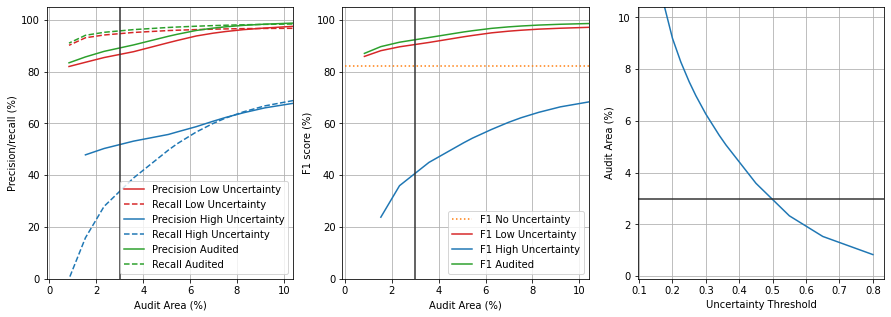

In [ ]:
trainer.plotUncertaintyAA()

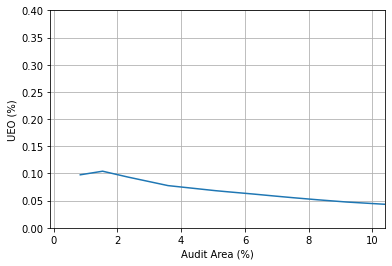

In [ ]:
trainer.plotUEO()

In [ ]:
trainer.getOptimalUncertaintyThreshold()

ic| bounds: (0.0015, 0.9985)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.38232011321635484
threshold 0.38232011321635484
(51604713,) (51604713,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2533718,)
    predicted_test_classified_incorrect.shape: (2533718,)


cm_correct [[51017166    54920]
 [   22698   509929]]


ic| TP_H + FN_H + FP_H + TN_H: 2533718
    len(label_mask_current_deforestation_test): 54138431
ic| TP_H + FN_H + FP_H + TN_H: 2533718
    len(label_mask_current_deforestation_test): 54138431


cm_incorrect [[2255371   77593]
 [ 106372   94382]]
[0.90277047 0.95738481 0.69531253 0.04680073 0.54881233 0.47013758
 0.07044861]
0.6176798867836452
threshold 0.6176798867836452
(53190230,) (53190230,)


ic| label_current_deforestation_test_classified_incorrect.shape: (948201,)
    predicted_test_classified_incorrect.shape: (948201,)
ic| TP_H + FN_H + FP_H + TN_H: 948201
    len(label_mask_current_deforestation_test): 54138431
ic| TP_H + FN_H + FP_H + TN_H: 948201
    len(label_mask_current_deforestation_test): 54138431


cm_correct [[52458432   108980]
 [   40888   581930]]
cm_incorrect [[814105  23533]
 [ 88182  22381]]
[0.842266   0.93435    0.79348933 0.01751438 0.48745481 0.20242758
 0.10173769]
0.7631402264327096
threshold 0.7631402264327096
(53603645,) (53603645,)


ic| label_current_deforestation_test_classified_incorrect.shape: (534786,)
    predicted_test_classified_incorrect.shape: (534786,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 534786
    len(label_mask_current_deforestation_test): 54138431
ic| TP_H + FN_H + FP_H + TN_H: 534786
    len(label_mask_current_deforestation_test): 54138431


cm_correct [[52811185   132513]
 [   55636   604311]]
cm_incorrect [[461352      0]
 [ 73434      0]]
[0.82015651 0.91569626 0.82400689 0.00987812        nan 0.
 0.1015776 ]
0.5492860736362758
threshold 0.5492860736362758
(52871697,) (52871697,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1266734,)
    predicted_test_classified_incorrect.shape: (1266734,)
ic| TP_H + FN_H + FP_H + TN_H: 1266734
    len(label_mask_current_deforestation_test): 54138431
ic| TP_H + FN_H + FP_H + TN_H: 1266734
    len(label_mask_current_deforestation_test): 54138431


cm_correct [[52172767    96344]
 [   34975   567611]]
cm_incorrect [[1099770   36169]
 [  94095   36700]]
[0.85489378 0.94195849 0.77396469 0.02339806 0.50364352 0.28059177
 0.09317529]
0.5146663158287613
threshold 0.5146663158287613
(52667222,) (52667222,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1471209,)
    predicted_test_classified_incorrect.shape: (1471209,)
ic| TP_H + FN_H + FP_H + TN_H: 1471209
    len(label_mask_current_deforestation_test): 54138431
ic| TP_H + FN_H + FP_H

cm_correct [[51985637    90025]
 [   32203   559357]]
cm_incorrect [[1286900   42488]
 [  96867   44954]]


 + TN_H: 1471209
    len(label_mask_current_deforestation_test): 54138431


[0.86136819 0.94556258 0.76270997 0.02717495 0.51410078 0.31697703
 0.08745561]
0.46411456471280216
threshold 0.46411456471280216
(52308833,) (52308833,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1829598,)
    predicted_test_classified_incorrect.shape: (1829598,)


cm_correct [[51656787    78999]
 [   28447   544600]]


ic| TP_H + FN_H + FP_H + TN_H: 1829598
    len(label_mask_current_deforestation_test): 54138431
ic| TP_H + FN_H + FP_H + TN_H: 1829598
    len(label_mask_current_deforestation_test): 54138431


cm_incorrect [[1615750   53514]
 [ 100623   59711]]
[0.87331763 0.95035835 0.7425881  0.03379481 0.52736586 0.37241633
 0.07957331]
0.4957588742902283
threshold 0.4957588742902283
(52541911,) (52541911,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1596520,)
    predicted_test_classified_incorrect.shape: (1596520,)
ic

cm_correct [[51870624    86221]
 [   30773   554293]]
cm_incorrect [[1401913   46292]
 [  98297   50018]]


| TP_H + FN_H + FP_H + TN_H: 1596520
    len(label_mask_current_deforestation_test): 54138431
ic| TP_H + FN_H + FP_H + TN_H: 1596520
    len(label_mask_current_deforestation_test): 54138431


[0.8653878  0.94740252 0.75580496 0.02948959 0.51934379 0.33724168
 0.08438157]
0.49153392320939654
threshold 0.49153392320939654
(52512518,) (52512518,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1625913,)
    predicted_test_classified_incorrect.shape: (1625913,)
ic

cm_correct [[51843627    85311]
 [   30454   553126]]
cm_incorrect [[1428910   47202]
 [  98616   51185]]


| TP_H + FN_H + FP_H + TN_H: 1625913
    len(label_mask_current_deforestation_test): 54138431
ic| TP_H + FN_H + FP_H + TN_H: 1625913
    len(label_mask_current_deforestation_test): 54138431


[0.86637523 0.94781521 0.7542137  0.03003251 0.5202415  0.34168664
 0.08372271]
0.4810606602134157
threshold 0.4810606602134157
(52437321,) (52437321,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1701110,)
    predicted_test_classified_incorrect.shape: (1701110,)


cm_correct [[51774567    83047]
 [   29661   550046]]


ic| TP_H + FN_H + FP_H + TN_H: 1701110
    len(label_mask_current_deforestation_test): 54138431
ic| TP_H + FN_H + FP_H + TN_H: 1701110
    len(label_mask_current_deforestation_test): 54138431


cm_incorrect [[1497970   49466]
 [  99409   54265]]
[0.86882338 0.9488345  0.75001398 0.03142149 0.52313195 0.35311764
 0.08207825]
0.49026353881551155
threshold 0.49026353881551155
(52503722,) (52503722,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1634709,)
    predicted_test_classified_incorrect.shape: (1634709,)
ic

cm_correct [[51835505    85055]
 [   30368   552794]]
cm_incorrect [[1437032   47458]
 [  98702   51517]]


| TP_H + FN_H + FP_H + TN_H: 1634709
    len(label_mask_current_deforestation_test): 54138431
ic| TP_H + FN_H + FP_H + TN_H: 1634709
    len(label_mask_current_deforestation_test): 54138431


[0.86665339 0.94792528 0.75376101 0.03019498 0.52050518 0.34294597
 0.0835137 ]
0.49235680606276483
threshold 0.49235680606276483
(52518298,) (52518298,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1620133,)
    predicted_test_classified_incorrect.shape: (1620133,)
ic

cm_correct [[51848957    85481]
 [   30517   553343]]
cm_incorrect [[1423580   47032]
 [  98553   50968]]


| TP_H + FN_H + FP_H + TN_H: 1620133
    len(label_mask_current_deforestation_test): 54138431
ic| TP_H + FN_H + FP_H + TN_H: 1620133
    len(label_mask_current_deforestation_test): 54138431


[0.86619006 0.94773233 0.75450959 0.02992575 0.52008163 0.34087519
 0.083856  ]
0.49164812650199574
threshold 0.49164812650199574
(52513370,) (52513370,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1625061,)
    predicted_test_classified_incorrect.shape: (1625061,)
ic

cm_correct [[51844435    85327]
 [   30461   553147]]
cm_incorrect [[1428102   47186]
 [  98609   51164]]


| TP_H + FN_H + FP_H + TN_H: 1625061
    len(label_mask_current_deforestation_test): 54138431
ic| TP_H + FN_H + FP_H + TN_H: 1625061
    len(label_mask_current_deforestation_test): 54138431


[0.86635791 0.94780572 0.75424234 0.03001677 0.52022369 0.3416103
 0.08374937]
0.4918500235447909
threshold 0.4918500235447909
(52514841,) (52514841,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1623590,)
    predicted_test_classified_incorrect.shape: (1623590,)
ic

cm_correct [[51845788    85375]
 [   30474   553204]]
cm_incorrect [[1426749   47138]
 [  98596   51107]]


| TP_H + FN_H + FP_H + TN_H: 1623590
    len(label_mask_current_deforestation_test): 54138431
ic| TP_H + FN_H + FP_H + TN_H: 1623590
    len(label_mask_current_deforestation_test): 54138431


[0.86630472 0.94778971 0.75432006 0.0299896  0.5201995  0.34138928
 0.08378218]
0.4917960563034914
threshold 0.4917960563034914
(52514451,) (52514451,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1623980,)
    predicted_test_classified_incorrect.shape: (1623980,)
ic

cm_correct [[51845430    85363]
 [   30469   553189]]
cm_incorrect [[1427107   47150]
 [  98601   51122]]


| TP_H + FN_H + FP_H + TN_H: 1623980
    len(label_mask_current_deforestation_test): 54138431
ic| TP_H + FN_H + FP_H + TN_H: 1623980
    len(label_mask_current_deforestation_test): 54138431


[0.86631786 0.94779648 0.75429961 0.02999681 0.52020922 0.34144387
 0.08377399]
0.4917627156756437
threshold 0.4917627156756437
(52514206,) (52514206,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1624225,)
    predicted_test_classified_incorrect.shape: (1624225,)
ic

cm_correct [[51845202    85357]
 [   30466   553181]]
cm_incorrect [[1427335   47156]
 [  98604   51130]]


| TP_H + FN_H + FP_H + TN_H: 1624225
    len(label_mask_current_deforestation_test): 54138431
ic| TP_H + FN_H + FP_H + TN_H: 1624225
    len(label_mask_current_deforestation_test): 54138431


[0.86632432 0.94780064 0.7542887  0.03000133 0.52021651 0.34147221
 0.0837678 ]
0.49172937504829056
threshold 0.49172937504829056
(52513984,) (52513984,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1624447,)
    predicted_test_classified_incorrect.shape: (1624447,)
ic

cm_correct [[51844994    85354]
 [   30466   553170]]
cm_incorrect [[1427543   47159]
 [  98604   51141]]


| TP_H + FN_H + FP_H + TN_H: 1624447
    len(label_mask_current_deforestation_test): 54138431
ic| TP_H + FN_H + FP_H + TN_H: 1624447
    len(label_mask_current_deforestation_test): 54138431
ic| self.threshold_optimal: 0.4917627156756437


[0.86632609 0.94779966 0.7542737  0.03000543 0.52025432 0.34152058
 0.08375899]


In [ ]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.4917627156756437
(52514206,) (52514206,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1624225,)
    predicted_test_classified_incorrect.shape: (1624225,)
ic

cm_correct [[51845202    85357]
 [   30466   553181]]
cm_incorrect [[1427335   47156]
 [  98604   51130]]


| TP_H + FN_H + FP_H + TN_H: 1624225
    len(label_mask_current_deforestation_test): 54138431
ic| TP_H + FN_H + FP_H + TN_H: 1624225
    len(label_mask_current_deforestation_test): 54138431


[0.86632432 0.94780064 0.7542887  0.03000133 0.52021651 0.34147221
 0.0837678 ]
threshold 0.4917627156756437
(54138431,) (54138431,)


ic| self.m_optimal: {'AA': array([0.03000133]),
                     'UEO': array([0.0837678]),
                     'f1': 82.21,
                     'f1_H': array([0.41230546]),
                     'f1_L': array([0.90523284]),
                     'precision_H': array([0.52021651]),
                     'precision_L': array([0.86632432]),
                     'recall_H': array([0.34147221]),
                     'recall_L': array([0.94780064]),
                     'recall_Ltotal': array([0.7542887])}
ic| self.m_audited_optimal: {'f1': array([0.92388343]),
                             'precision': array([0.89171631]),
                             'recall': array([0.95845815])}


cm_audited [[53319693    85357]
 [   30466   702915]]
[0.89171631 0.95845815]


{'metrics': {'precision_L': array([0.86632432]),
  'recall_L': array([0.94780064]),
  'recall_Ltotal': array([0.7542887]),
  'AA': array([0.03000133]),
  'precision_H': array([0.52021651]),
  'recall_H': array([0.34147221]),
  'UEO': array([0.0837678]),
  'f1_L': array([0.90523284]),
  'f1_H': array([0.41230546]),
  'f1': 82.21},
 'metrics_audited': {'precision': array([0.89171631]),
  'recall': array([0.95845815]),
  'f1': array([0.92388343])},
 'exp': 187}